In [4]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline


# The tech stocks we'll use for this analysis
tech_list = [1,2,3,4]
df=pd.DataFrame()
company_list=[]
com1=pd.DataFrame()
com2=pd.DataFrame()
com3=pd.DataFrame()
com4=pd.DataFrame()
com5=pd.DataFrame()
for file in os.listdir('/kaggle/input/stockp'):
    if(file[0]!='t'):
        temp=pd.read_csv(os.path.join('/kaggle/input/stockp',file))
        temp['Company']=int(file[0])
        df=df.append(temp)
        if(int(file[0])==1):com1=temp
        elif(int(file[0])==2):com2=temp
        elif(int(file[0])==3):com3=temp
        else:com4=temp
        company_list.append(temp)
    else:
        temp = pd.read_csv(os.path.join('/kaggle/input/stockp',file))
        com5 = temp
        
    
company_list=sorted(company_list,key=lambda x:x.loc[1,'Company'])
print(com5[:int(2532/4)])
com5['Close']=0

com5.drop(["ID"],inplace=True,axis=1)
company_list[3]=pd.concat([com4,com5[:int(2532/4)]])
com4=company_list[3]

company_list[2]=pd.concat([com3,com5[int(2532/4):int(2532/4)*2]])
com3=company_list[2]
company_list[0]=pd.concat([com1,com5[int(2532/4)*2:int(2532/4)*3]])
com1=company_list[0]
company_list[1]=pd.concat([com2,com5[int(2532/4)*3:int(2532/4)*4]])
com2=company_list[1]

company_list[3].reset_index(inplace = True, drop = True)
com4.reset_index(inplace = True, drop = True)
com3.reset_index(inplace = True, drop = True)
com2.reset_index(inplace = True, drop = True)
com1.reset_index(inplace = True, drop = True)
company_list[2].reset_index(inplace = True, drop = True)
company_list[1].reset_index(inplace = True, drop = True)
company_list[0].reset_index(inplace = True, drop = True)

           Date    Open    High     Low  Adj Close       Volume  Company   ID
0    17-07-2020  101.04  102.52   99.28      99.93  139950000.0      4.0    0
1    20-07-2020  101.28  110.03   99.24     109.62  256821000.0      4.0    1
2    21-07-2020  109.12  111.60  103.88     104.46  241608000.0      4.0    2
3    22-07-2020  106.65  108.45  104.05     105.86  212416500.0      4.0    3
4    23-07-2020  112.07  112.49   98.92     101.04  364927500.0      4.0    4
..          ...     ...     ...     ...        ...          ...      ...  ...
628  13-01-2023  116.49  122.75  115.55     122.39  180439300.0      4.0  628
629  17-01-2023  125.67  131.67  125.11     131.52  186477000.0      4.0  629
630  18-01-2023  136.41  136.66  127.05     128.64  195680300.0      4.0  630
631  19-01-2023  127.06  129.93  124.39     127.21  170291900.0      4.0  631
632  20-01-2023  128.37  133.69  127.26     133.37  138429900.0      4.0  632

[633 rows x 8 columns]


**This code contains company 2 LSTM + LR**

In [5]:
# General info
company_list[0].info()
company_list[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3163 non-null   object 
 1   Open       3163 non-null   float64
 2   High       3163 non-null   float64
 3   Low        3163 non-null   float64
 4   Close      3163 non-null   float64
 5   Adj Close  3163 non-null   float64
 6   Volume     3163 non-null   float64
 7   Company    3163 non-null   float64
dtypes: float64(7), object(1)
memory usage: 197.8+ KB


,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,2010-06-29,9.50,9.47,9.23,9.04,7.93,1.133345e+09,1.0
1,2010-06-30,9.25,9.22,9.00,8.70,7.52,7.394520e+08,1.0
2,2010-07-01,9.01,9.02,8.63,8.94,7.45,1.022896e+09,1.0
3,2010-07-02,8.98,8.96,8.74,8.85,7.68,6.938428e+08,1.0
4,2010-07-06,9.13,9.13,8.61,9.36,7.68,6.152356e+08,1.0
...,...,...,...,...,...,...,...,...
3158,2023-01-13,132.12,134.89,131.71,0.00,134.75,5.775800e+07,1.0
3159,2023-01-17,134.81,137.24,134.02,0.00,136.11,6.364660e+07,1.0
3160,2023-01-18,136.82,138.61,135.19,0.00,135.12,6.967280e+07,1.0
3161,2023-01-19,134.00,136.21,133.71,0.00,135.28,5.828040e+07,1.0


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

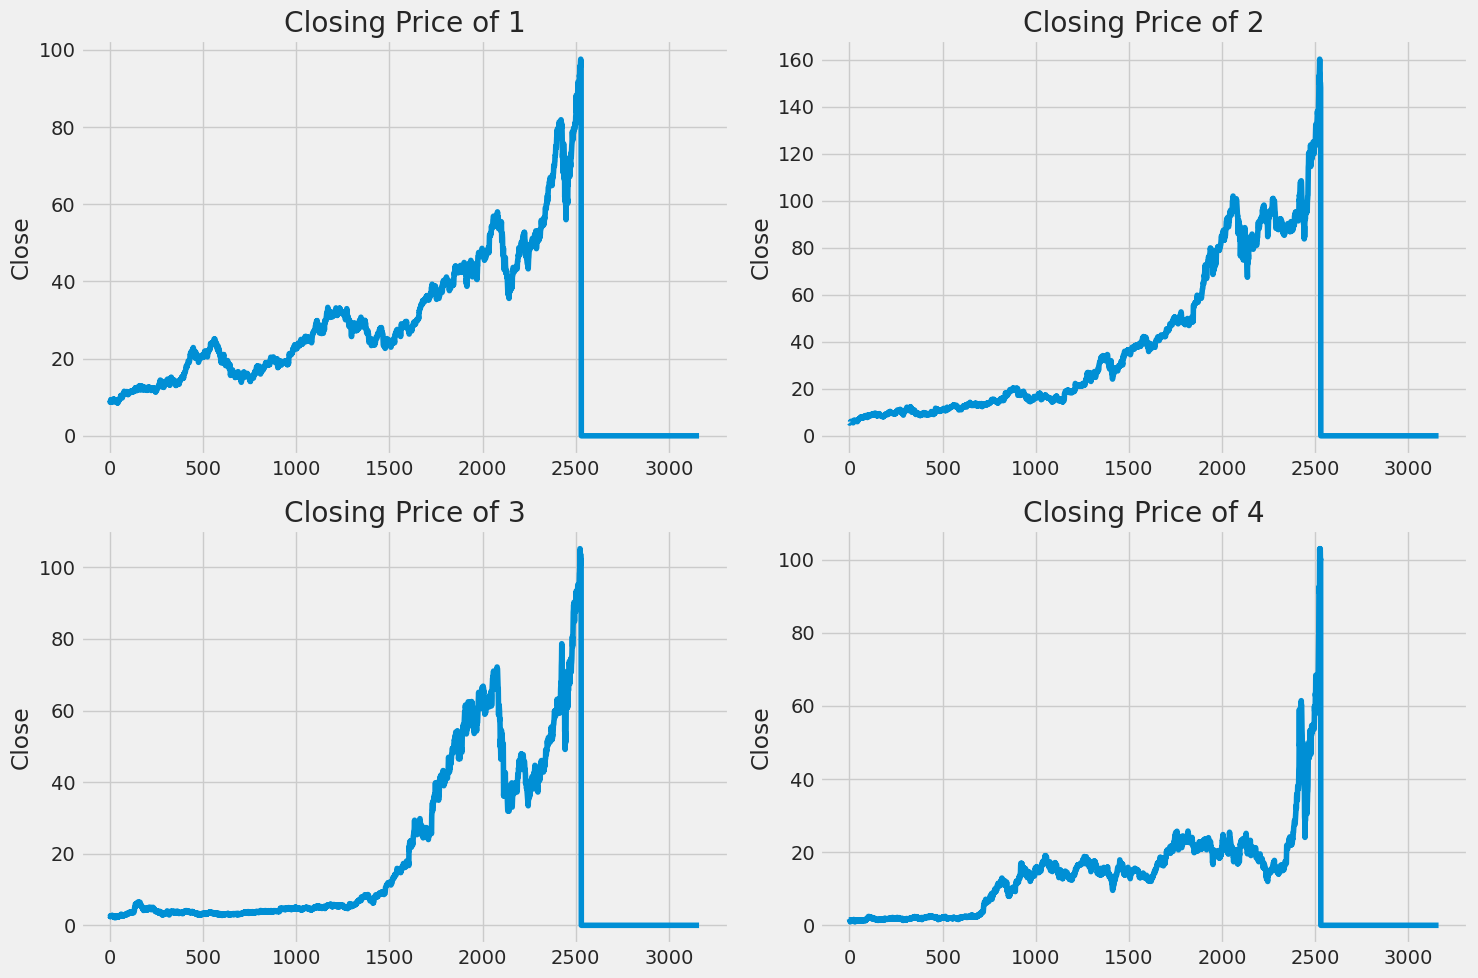

In [6]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

# 2. What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

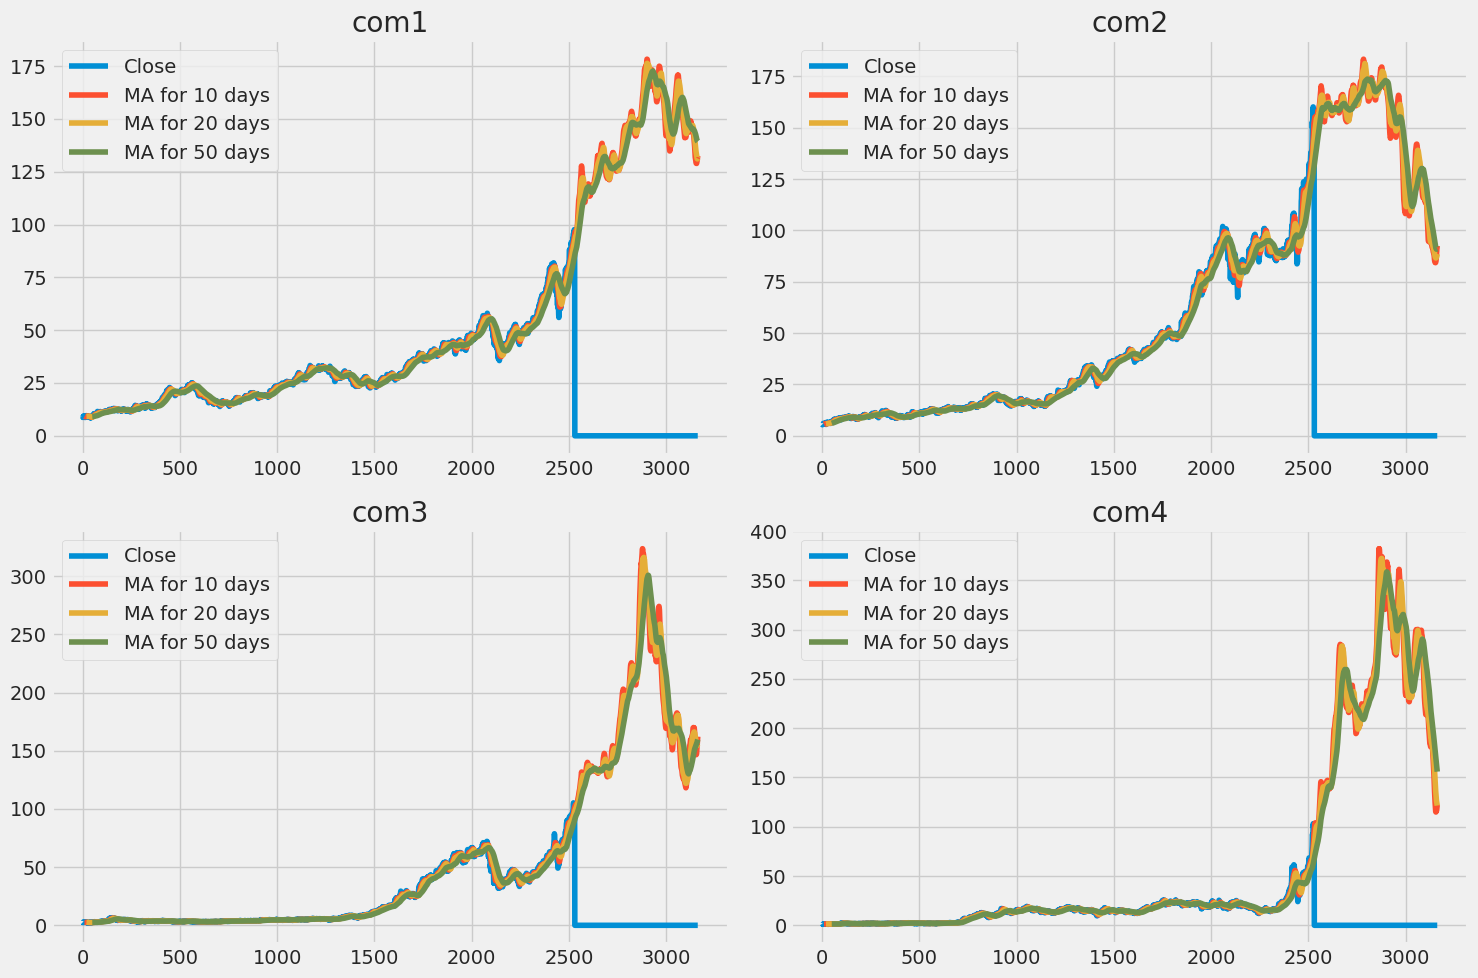

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Open'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

com1[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('com1')

com2[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('com2')

com3[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('com3')

com4[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('com4')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# Company 1 Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
com1.drop(['Company'],inplace=True,axis=1)

df = com1.iloc[:,0:7]
# Show the data
df
data_X = df.filter(['Open','High','Low','Adj Close','Volume'])
data_Y = df.filter(['Close'])
dataset_X = data_X.values
dataset_Y = data_Y.values
training_data_len = 2530
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler(feature_range=(0,1))
scaled_data_X = scaler_X.fit_transform(dataset_X)

scaler_Y = MinMaxScaler(feature_range=(0,1))
scaled_data_Y = scaler_Y.fit_transform(dataset_Y)
train_data_X = scaled_data_X[0:int(training_data_len), :]
train_data_Y = scaled_data_Y[0:int(training_data_len), :]
model = LinearRegression()
model.fit(train_data_X,train_data_Y)
test_data_X = scaled_data_X[training_data_len: , :]
pred = model.predict(test_data_X)
pred = scaler_Y.inverse_transform(pred)
final_sub=[]
pos_diff=[]
for x in range (0,633):
    final_sub.append(pred[x][0])
    val1=pred[x][0]
    val2=data_Y['Close'][2530+x]
    pos_diff.append(val1)
print(pos_diff)


[96.51923515077871, 97.87829600399498, 97.64119614941396, 97.8304001851348, 93.67826496992254, 91.44515244789842, 94.6718061344244, 93.98635768850123, 94.91252732419993, 95.49870164150458, 104.15758468812139, 110.23501313662948, 109.75234687728067, 110.05262460027457, 112.80749467005269, 111.5551791586275, 112.10721884769531, 110.39140527916618, 112.53918226335105, 115.51536448657022, 114.19502446279952, 114.89197648726079, 115.52032132587613, 116.73172179145256, 117.95209500127113, 123.29875450024493, 125.83593860335073, 124.4107866098958, 126.2277699578859, 125.30326089848839, 125.48917720353235, 129.03253559635613, 133.13018164485317, 130.86148196590034, 123.4672327567105, 116.98699496800666, 115.92504519641923, 117.55020491091396, 114.83304646008588, 112.16117121919115, 114.68741553250916, 115.48176854058919, 113.45046889511387, 110.84094405963481, 107.60907699140567, 107.7885863399322, 110.86043347141776, 108.78994007916981, 108.66610839450246, 110.94653795816376, 114.187513822984

# Company 1 LSTM

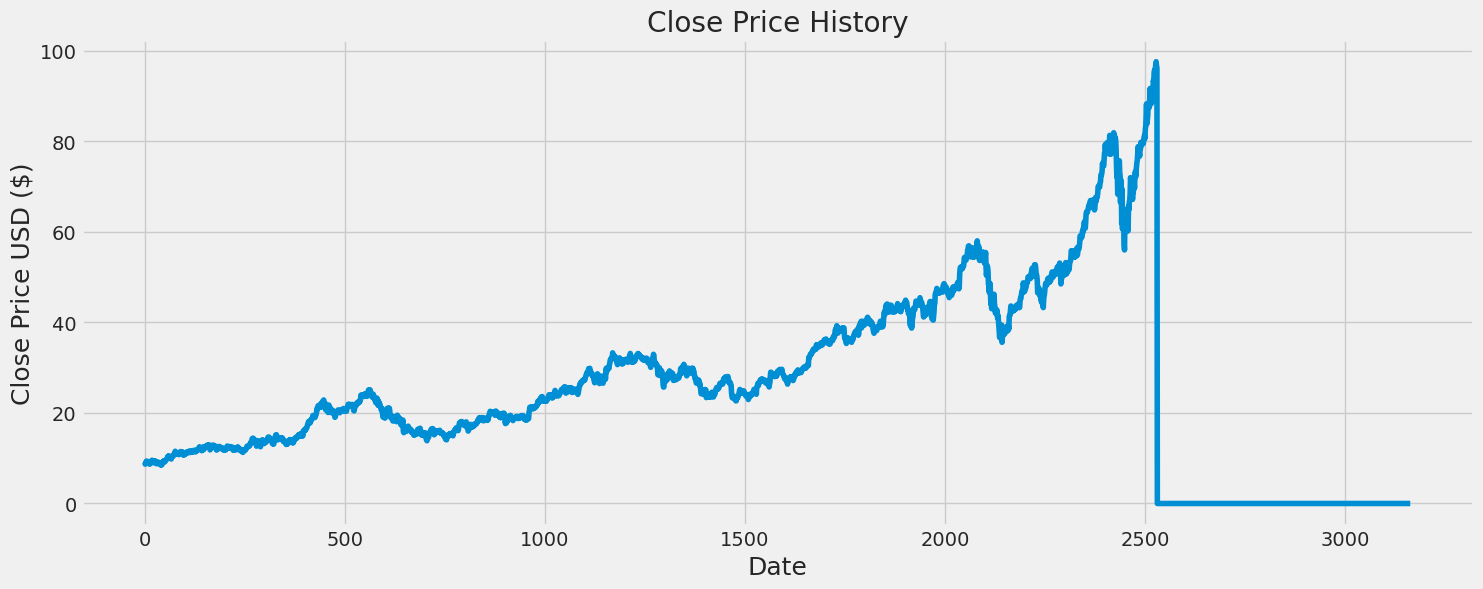

[[9.5000000e+00 9.4700000e+00 9.2300000e+00 7.9300000e+00 1.1333448e+09]
 [9.2500000e+00 9.2200000e+00 9.0000000e+00 7.5200000e+00 7.3945200e+08]
 [9.0100000e+00 9.0200000e+00 8.6300000e+00 7.4500000e+00 1.0228960e+09]
 ...
 [1.3682000e+02 1.3861000e+02 1.3519000e+02 1.3512000e+02 6.9672800e+07]
 [1.3400000e+02 1.3621000e+02 1.3371000e+02 1.3528000e+02 5.8280400e+07]
 [1.3535000e+02 1.3796000e+02 1.3435000e+02 1.3789000e+02 7.9972200e+07]]
Complete data length =  3163
Training data length =  2530
Epoch 1/4
494/494 [==============================] - 10s 4ms/step - loss: 0.0024
Epoch 2/4
494/494 [==============================] - 2s 4ms/step - loss: 2.0514e-04
Epoch 3/4
494/494 [==============================] - 2s 5ms/step - loss: 1.7528e-04
Epoch 4/4
20/20 [==============================] - 0s 3ms/step
98.45141
98.45140838623047


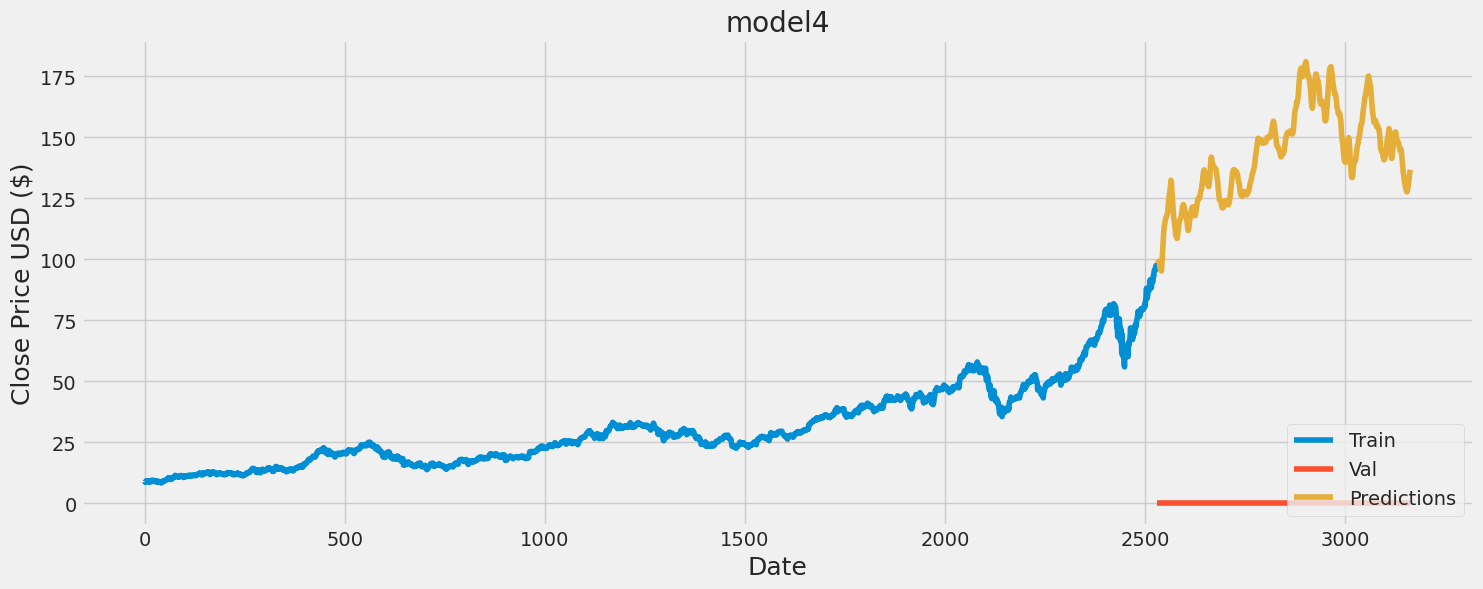

,Close,Predictions
2530,0.0,98.451408
2531,0.0,98.688545
2532,0.0,98.944412
2533,0.0,99.222198
2534,0.0,99.267311
...,...,...
3158,0.0,131.757553
3159,0.0,132.961761
3160,0.0,134.492538
3161,0.0,135.969864


In [10]:
# Get the stock quote
df = com1.iloc[:,0:7]
# Show the data
df

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


# Seperate the dataframe in X and Y
data_X = df.filter(['Open','High','Low','Adj Close','Volume'])
data_Y = df.filter(['Close'])

# Convert the dataframes to numpy arrays
dataset_X = data_X.values
dataset_Y = data_Y.values

print(dataset_X)

# Get the number of rows to train the model3 on
training_data_len = 2530
print("Complete data length = ", len(dataset_Y))
print("Training data length = ",training_data_len)


# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler(feature_range=(0,1))
scaled_data_X = scaler_X.fit_transform(dataset_X)

scaler_Y = MinMaxScaler(feature_range=(0,1))
scaled_data_Y = scaler_Y.fit_transform(dataset_Y)


# Create the training data set 
# Create the scaled training data set
train_data_X = scaled_data_X[0:int(training_data_len), :]
train_data_Y = scaled_data_Y[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data_X)+1):
    x_train.append(train_data_X[i-60:i, :]) # 60 steps per sample, everything 
                                           # other than close is a feature
    y_train.append(train_data_Y[i-1, :]) # actual close value that comes next
    
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# print("x_train: ",x_train)
# print("y_train: ",y_train)



from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model1 = Sequential()
model1.add(LSTM(64, return_sequences=False, input_shape= (x_train.shape[1], 5)))
model1.add(Dense(1))

# Compile the model3
model1.compile(optimizer='adam', loss='mean_squared_error')

# Train the model3
model1.fit(x_train, y_train, batch_size=5, epochs=4)


# Create the testing data set
# Use the remaining amount as testing data
test_data_X = scaled_data_X[training_data_len - 59: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset_Y[training_data_len: ,0]

for i in range(60, len(test_data_X)+1):
    x_test.append(test_data_X[i-60:i, :])# For case i = 0 , 59 characters from training set and 1 from testing set. This will predict the closing day of next day which is our output.
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Get the model3s predicted price values 
predictions = model1.predict(x_test)

predictions = scaler_Y.inverse_transform(predictions)
print(predictions[0][0])

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions[0][0] - y_test[0]) ** 2)))
print(rmse)



# Plot the data
# Training values
train = data_Y.iloc[:training_data_len,0]

# Actual valid values
valid = pd.DataFrame()
valid = data_Y.iloc[training_data_len:,0]
valid = pd.DataFrame(valid,columns=['Close'])

valid['Predictions'] = 0.2

for i in range(len(predictions)):
    valid.iloc[i,1]=predictions[i][0]

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('model4')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()



# Show the valid and predicted prices
valid

In [11]:
comp1=pd.DataFrame()
L=[]
for x in range (0,633):
    L.append(633*2+x)
comp1['Id']=L
comp1['Close']=final_sub

comp1.to_csv('comp1.csv',index=False)

# Linear Regression Company 2

In [5]:
from sklearn.linear_model import LinearRegression
com2.drop(['Company'],inplace=True,axis=1)
df = com2.iloc[:,0:7]
# Show the data
df
data_X = df.filter(['Open','High','Low','Adj Close','Volume'])
data_Y = df.filter(['Close'])
dataset_X = data_X.values
dataset_Y = data_Y.values
training_data_len = 2530
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler(feature_range=(0,1))
scaled_data_X = scaler_X.fit_transform(dataset_X)

scaler_Y = MinMaxScaler(feature_range=(0,1))
scaled_data_Y = scaler_Y.fit_transform(dataset_Y)
train_data_X = scaled_data_X[0:int(training_data_len), :]
train_data_Y = scaled_data_Y[0:int(training_data_len), :]
model = LinearRegression()
model.fit(train_data_X,train_data_Y)
test_data_X = scaled_data_X[training_data_len: , :]
pred = model.predict(test_data_X)
pred = scaler_Y.inverse_transform(pred)
final_sub=[]
pos_diff=[]
for x in range (0,633):
    final_sub.append(pred[x][0])
    val1=pred[x][0]
    val2=data_Y['Close'][2530+x]
    pos_diff.append(val1)
print(pos_diff)


[148.48598047734984, 160.3975104598748, 157.08823346096102, 155.2171514674348, 149.5308979237636, 150.5074598411973, 153.0219613789643, 150.57103025014413, 151.54473012193014, 153.33047832472874, 158.4275710413861, 155.88059388276588, 157.56113010703723, 160.4783736315949, 161.3397652189257, 158.61412633690193, 156.90179353601633, 154.92986361134388, 158.33098770878613, 158.79511449571447, 157.02008346811073, 159.18125918348977, 165.92747568429388, 163.5714338853324, 165.101572711829, 164.67261511576675, 166.03335271697873, 167.53973334112766, 172.48462895843576, 170.0217188114811, 170.19484756986589, 173.33950592380137, 175.12374918258647, 176.37306397698688, 168.1129180916289, 163.6306775202491, 159.21617883522833, 164.22320132241734, 159.93945156472412, 155.83778168160654, 155.62002533484673, 157.9532156699396, 154.18824872105915, 150.39228145066247, 147.6354609550575, 147.75493079638053, 156.28760038729064, 150.4388964288792, 151.95981471537323, 154.56863132742404, 158.465249025113

# LSTM company 2

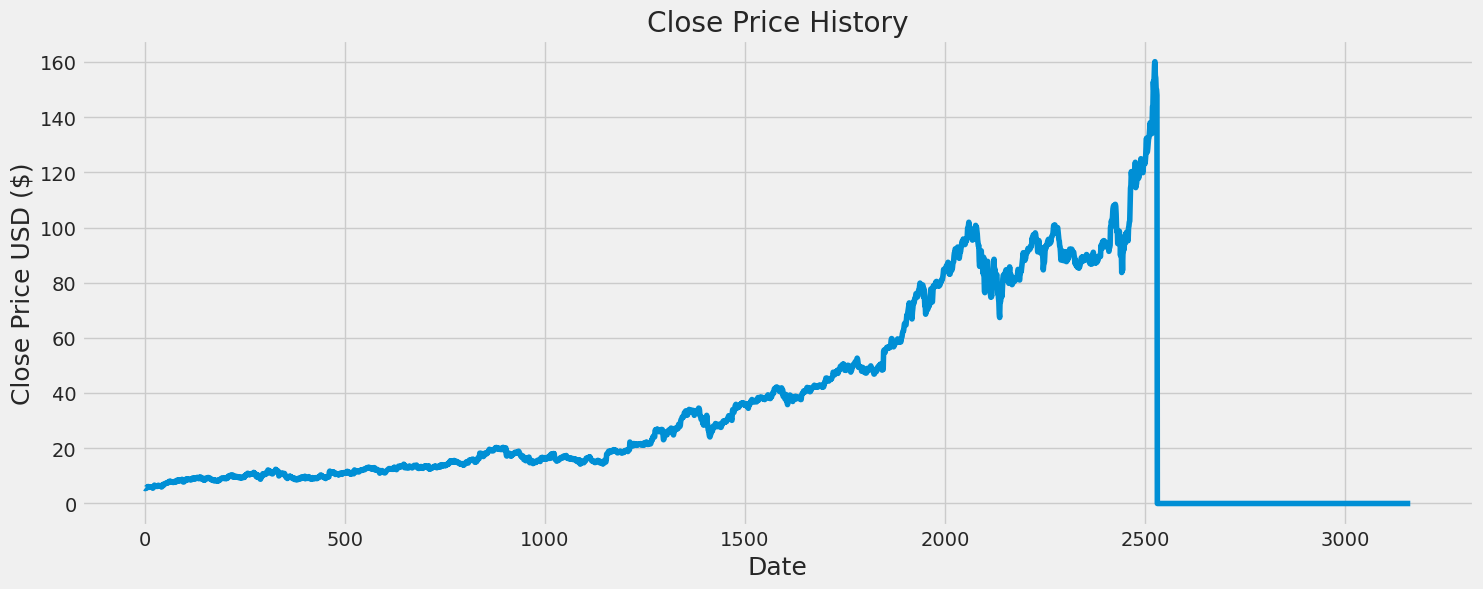

[[5.73000e+00 5.94000e+00 5.19000e+00 5.52000e+00 2.57326e+08]
 [5.49000e+00 5.73000e+00 5.28000e+00 5.36000e+00 1.94814e+08]
 [5.48000e+00 5.61000e+00 5.47000e+00 5.65000e+00 1.70596e+08]
 ...
 [9.73800e+01 9.93100e+01 9.54200e+01 9.55300e+01 7.95704e+07]
 [9.47400e+01 9.53800e+01 9.29800e+01 9.37800e+01 6.90027e+07]
 [9.38500e+01 9.74100e+01 9.32000e+01 9.71500e+01 6.73071e+07]]
Complete data length =  3163
Training data length =  2530
Epoch 1/4
494/494 [==============================] - 3s 4ms/step - loss: 0.0013
Epoch 2/4
494/494 [==============================] - 2s 4ms/step - loss: 1.7715e-04
Epoch 3/4
494/494 [==============================] - 3s 5ms/step - loss: 1.3810e-04
Epoch 4/4
20/20 [==============================] - 0s 3ms/step
153.58719
153.58718872070312


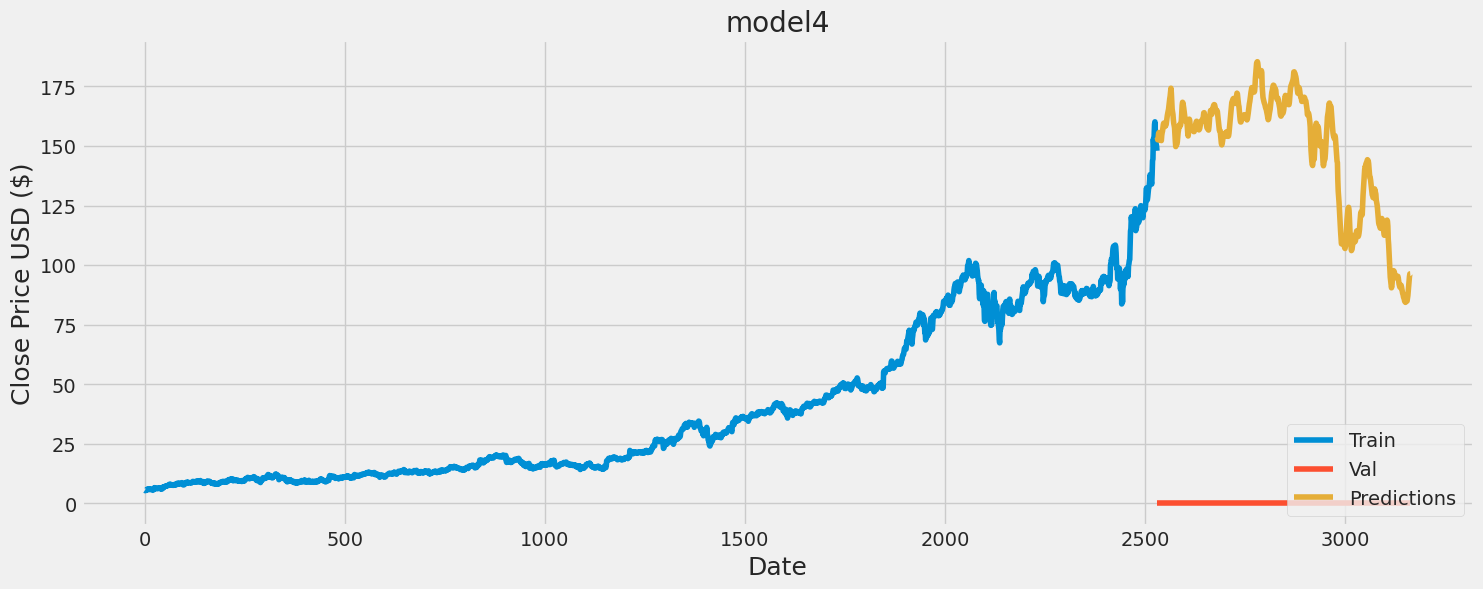

,Close,Predictions
2530,0.0,153.587189
2531,0.0,152.608810
2532,0.0,153.288925
2533,0.0,155.175873
2534,0.0,155.674957
...,...,...
3158,0.0,91.501602
3159,0.0,93.496239
3160,0.0,95.277435
3161,0.0,96.352043


In [13]:
# Get the stock quote
df = com2.iloc[:,0:7]
# Show the data
df

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


# Seperate the dataframe in X and Y
data_X = df.filter(['Open','High','Low','Adj Close','Volume'])
data_Y = df.filter(['Close'])

# Convert the dataframes to numpy arrays
dataset_X = data_X.values
dataset_Y = data_Y.values

print(dataset_X)

# Get the number of rows to train the model3 on
training_data_len = 2530
print("Complete data length = ", len(dataset_Y))
print("Training data length = ",training_data_len)


# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler(feature_range=(0,1))
scaled_data_X = scaler_X.fit_transform(dataset_X)

scaler_Y = MinMaxScaler(feature_range=(0,1))
scaled_data_Y = scaler_Y.fit_transform(dataset_Y)


# Create the training data set 
# Create the scaled training data set
train_data_X = scaled_data_X[0:int(training_data_len), :]
train_data_Y = scaled_data_Y[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data_X)+1):
    x_train.append(train_data_X[i-60:i, :]) # 60 steps per sample, everything 
                                           # other than close is a feature
    y_train.append(train_data_Y[i-1, :]) # actual close value that comes next
    
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# print("x_train: ",x_train)
# print("y_train: ",y_train)



from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model2 = Sequential()
model2.add(LSTM(64, return_sequences=False, input_shape= (x_train.shape[1], 5)))
model2.add(Dense(1))

# Compile the model3
model2.compile(optimizer='adam', loss='mean_squared_error')

# Train the model3
model2.fit(x_train, y_train, batch_size=5, epochs=4)


# Create the testing data set
# Use the remaining amount as testing data
test_data_X = scaled_data_X[training_data_len - 59: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset_Y[training_data_len: ,0]

for i in range(60, len(test_data_X)+1):
    x_test.append(test_data_X[i-60:i, :])# For case i = 0 , 59 characters from training set and 1 from testing set. This will predict the closing day of next day which is our output.
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Get the model3s predicted price values 
predictions = model2.predict(x_test)

predictions = scaler_Y.inverse_transform(predictions)
print(predictions[0][0])

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions[0][0] - y_test[0]) ** 2)))
print(rmse)



# Plot the data
# Training values
train = data_Y.iloc[:training_data_len,0]

# Actual valid values
valid = pd.DataFrame()
valid = data_Y.iloc[training_data_len:,0]
valid = pd.DataFrame(valid,columns=['Close'])

valid['Predictions'] = 0.2

for i in range(len(predictions)):
    valid.iloc[i,1]=predictions[i][0]

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('model4')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()



# Show the valid and predicted prices
valid

# Company 2 LSTM + LR

In [8]:

# com2.drop(['Company'],inplace=True,axis=1)

df = com2.iloc[:,0:7]
# Show the data
df

fin = []
scalerx = []
scalery = []
val = 0
for x in range (0,633):
    # print(df)
    print(x)
    # Seperate the dataframe in X and Y
    data_X = df.filter(['Open','High','Low','Adj Close','Volume'])
    data_Y = df.filter(['Close'])
    
    # Convert the dataframes to numpy arrays
    dataset_X = data_X.values

    training_data_len = 2530+x
    if x != 0:
        data_Y['Close'][training_data_len-1]=fin[x-1]
    dataset_Y = data_Y.values

    # Scale the data
    from sklearn.preprocessing import MinMaxScaler

    scaler_X = MinMaxScaler(feature_range=(0,1))
    scaled_data_X = scaler_X.fit_transform(dataset_X)

    scaler_Y = MinMaxScaler(feature_range=(0,1))
    scaled_data_Y = scaler_Y.fit_transform(dataset_Y)
    scalerx.append(scaler_X)
    scalery.append(scaler_Y)
    

    scaled_data_X


    # Create the training data set 
    # Create the scaled training data set
    train_data_X = scaled_data_X[0:int(training_data_len), :]
    train_data_Y = scaled_data_Y[0:int(training_data_len), :]

    # Split the data into x_train and y_train data sets
    x_train = []
    y_train = []

    for i in range(60, len(train_data_X) + 1):
        x_train.append(train_data_X[i-60:i, :]) # 60 steps per sample, everything 
                                               # other than close is a feature
        y_train.append(train_data_Y[i-1, :]) # actual close value that comes next


    # Convert the x_train and y_train to numpy arrays 
    x_train, y_train = np.array(x_train), np.array(y_train)

    
    from keras.models import Sequential
    from keras.layers import Dense, LSTM
    # Build the LSTM model
    model2 = Sequential()
    model2.add(LSTM(64, return_sequences=False, input_shape= (x_train.shape[1], 5)))
    # model1.add(LSTM(64, return_sequences=False))
    model2.add(Dense(1))

    # Compile the model1
    model2.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model1
    model2.fit(x_train, y_train, batch_size=8, epochs=4)


    # Create the testing data set
    # Use the remaining amount as testing data

    test_data_X = scaled_data_X[training_data_len - 59: , :] 

    # Create the data sets x_test and y_test
    x_test = []
    y_test = dataset_Y[training_data_len:training_data_len+1 ,0]  

    for i in range(60, len(test_data_X) + 1):
        x_test = []
        x_test.append(test_data_X[i-60:i, :])# For case i = 0 , 59 characters from training set and 1 from testing set. This will predict the closing day of next day which is our output.
        break


    x_test = np.array(x_test)

    predictions = model2.predict(x_test)

    predictions = scaler_Y.inverse_transform(predictions)

    y_test=y_test.reshape((1,1))
    val = predictions

    fin.append(val)


0
Epoch 1/4
309/309 [==============================] - 8s 5ms/step - loss: 0.0016
Epoch 2/4
309/309 [==============================] - 2s 5ms/step - loss: 1.3174e-04
Epoch 3/4
309/309 [==============================] - 2s 7ms/step - loss: 1.2145e-04
Epoch 4/4
1/1 [==============================] - 0s 361ms/step
1
Epoch 1/4
309/309 [==============================] - 3s 4ms/step - loss: 5.5043e-04
Epoch 2/4
309/309 [==============================] - 1s 4ms/step - loss: 1.1389e-04
Epoch 3/4
309/309 [==============================] - 2s 6ms/step - loss: 9.7140e-05
Epoch 4/4
1/1 [==============================] - 0s 332ms/step
2
Epoch 1/4
310/310 [==============================] - 3s 5ms/step - loss: 8.7971e-04
Epoch 2/4
310/310 [==============================] - 2s 5ms/step - loss: 1.5632e-04
Epoch 3/4
310/310 [==============================] - 2s 5ms/step - loss: 1.2093e-04
Epoch 4/4
1/1 [==============================] - 0s 460ms/step
3
Epoch 1/4
310/310 [==============================] 

In [9]:
# y=np.random.randint(2, size=633)
# Below was generated using above code
y=[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
g=[]
for x in range (0,633):
    if y[x]==1:
        g.append(1)
        final_sub[x]=fin[x][0][0]
    else:
        g.append(0)

print(g)

[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 

In [10]:
comp2=pd.DataFrame()
L=[]
for x in range (0,633):
    L.append(633*3+x)
comp2['Id']=L
comp2['Close']=final_sub

comp2.to_csv('ho633_comp2.csv',index=False)

# Linear Regression Company 3

In [ ]:
from sklearn.linear_model import LinearRegression
com3.drop(['Company'],inplace=True,axis=1)
df = com3.iloc[:,0:7]
# Show the data
df
data_X = df.filter(['Open','High','Low','Adj Close','Volume'])
data_Y = df.filter(['Close'])
dataset_X = data_X.values
dataset_Y = data_Y.values
training_data_len = 2530
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler(feature_range=(0,1))
scaled_data_X = scaler_X.fit_transform(dataset_X)

scaler_Y = MinMaxScaler(feature_range=(0,1))
scaled_data_Y = scaler_Y.fit_transform(dataset_Y)
train_data_X = scaled_data_X[0:int(training_data_len), :]
train_data_Y = scaled_data_Y[0:int(training_data_len), :]
model = LinearRegression()
model.fit(train_data_X,train_data_Y)
test_data_X = scaled_data_X[training_data_len: , :]
pred = model.predict(test_data_X)
pred = scaler_Y.inverse_transform(pred)
final_sub=[]
pos_diff=[]
for x in range (0,633):
    final_sub.append(pred[x][0])
    val1=pred[x][0]
    val2=data_Y['Close'][2530+x]
    pos_diff.append(abs(val1-val2))
print(final_sub)


In [16]:
comp3=pd.DataFrame()
L=[]
for x in range (0,633):
    L.append(633*3+x)
comp3['Id']=L
comp3['Close']=final_sub

comp3.to_csv('comp3.csv',index=False)

# LSTM Company 3

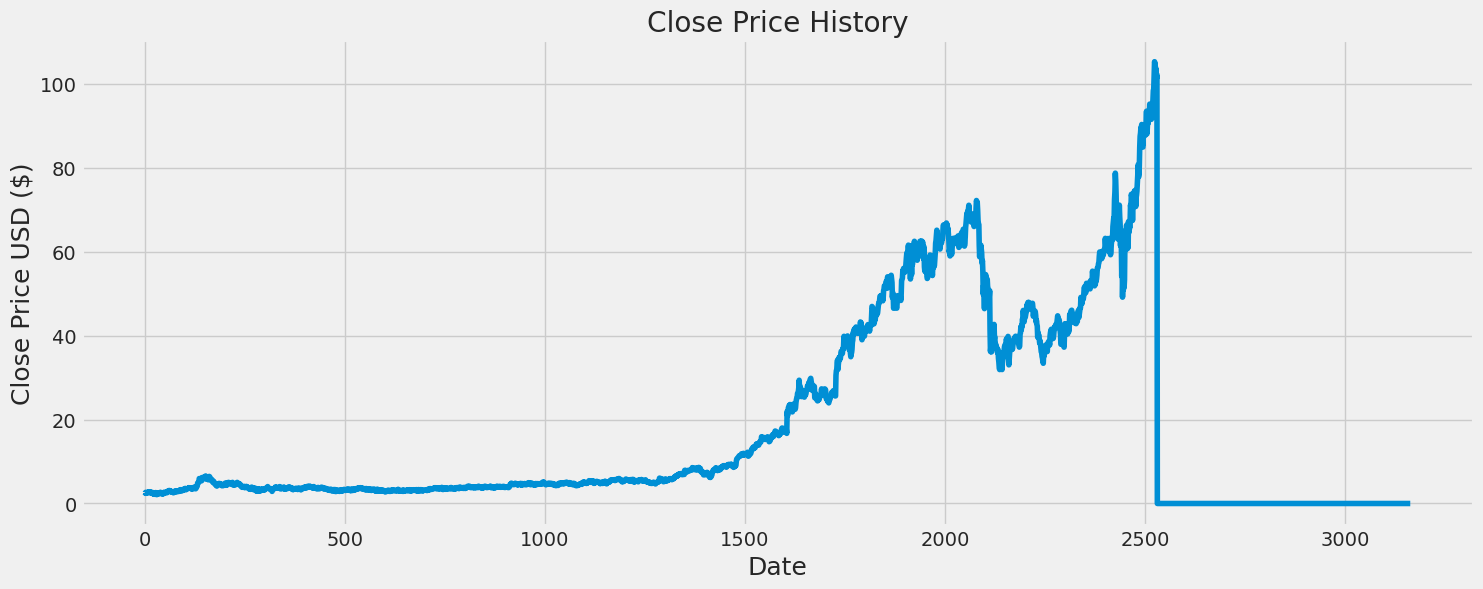

[[2.76000e+00 2.63000e+00 2.48000e+00 2.38000e+00 6.60808e+07]
 [2.62000e+00 2.54000e+00 2.73000e+00 2.15000e+00 6.23072e+07]
 [2.48000e+00 2.46000e+00 2.55000e+00 2.46000e+00 7.37008e+07]
 ...
 [1.76750e+02 1.78620e+02 1.72730e+02 1.73730e+02 4.39624e+07]
 [1.70530e+02 1.71840e+02 1.67150e+02 1.67850e+02 4.52932e+07]
 [1.70190e+02 1.78510e+02 1.68290e+02 1.78500e+02 5.64016e+07]]
Complete data length =  3163
Training data length =  2530
Epoch 1/4
494/494 [==============================] - 3s 4ms/step - loss: 0.0018
Epoch 2/4
494/494 [==============================] - 2s 5ms/step - loss: 3.3427e-04
Epoch 3/4
494/494 [==============================] - 2s 4ms/step - loss: 3.3909e-04
Epoch 4/4
20/20 [==============================] - 0s 3ms/step
103.861855
103.86185455322266


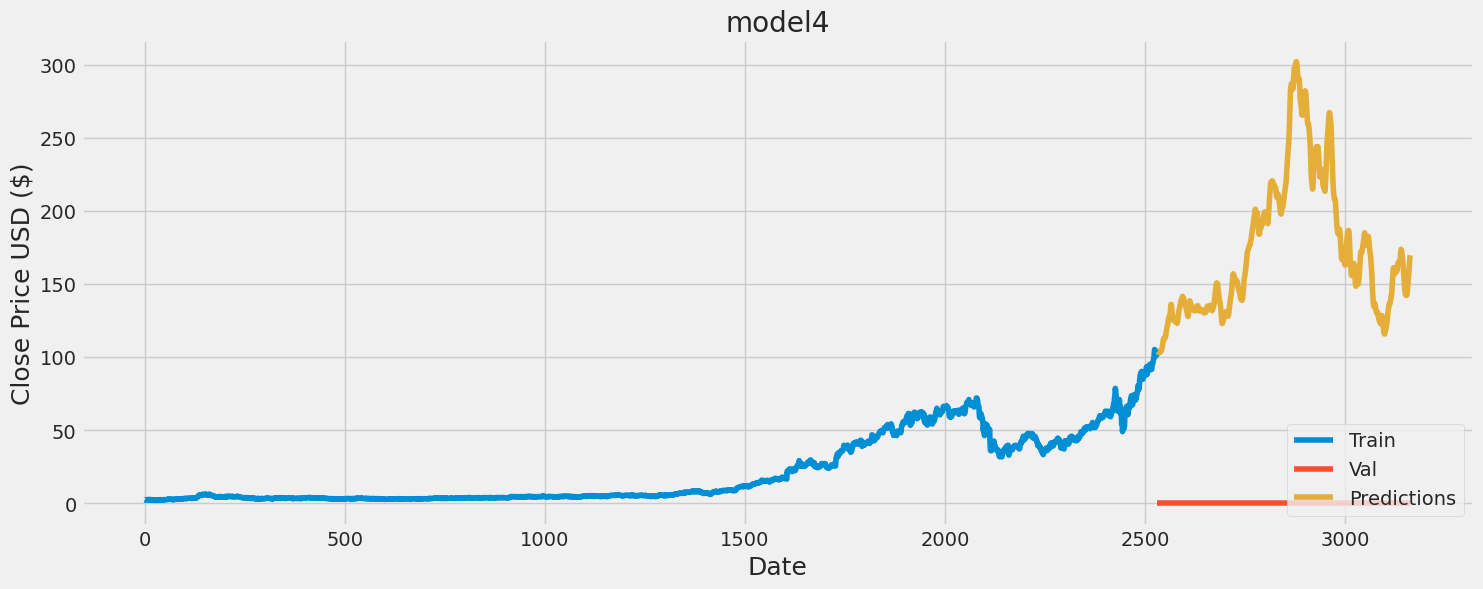

,Close,Predictions
2530,0.0,103.861855
2531,0.0,103.648476
2532,0.0,103.799011
2533,0.0,104.105164
2534,0.0,104.304100
...,...,...
3158,0.0,155.845200
3159,0.0,159.374496
3160,0.0,164.010666
3161,0.0,168.345917


In [17]:
# Get the stock quote
df = com3.iloc[:,0:7]
# Show the data
df

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


# Seperate the dataframe in X and Y
data_X = df.filter(['Open','High','Low','Adj Close','Volume'])
data_Y = df.filter(['Close'])

# Convert the dataframes to numpy arrays
dataset_X = data_X.values
dataset_Y = data_Y.values

print(dataset_X)

# Get the number of rows to train the model3 on
training_data_len = 2530
print("Complete data length = ", len(dataset_Y))
print("Training data length = ",training_data_len)


# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler(feature_range=(0,1))
scaled_data_X = scaler_X.fit_transform(dataset_X)

scaler_Y = MinMaxScaler(feature_range=(0,1))
scaled_data_Y = scaler_Y.fit_transform(dataset_Y)


# Create the training data set 
# Create the scaled training data set
train_data_X = scaled_data_X[0:int(training_data_len), :]
train_data_Y = scaled_data_Y[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data_X)+1):
    x_train.append(train_data_X[i-60:i, :]) # 60 steps per sample, everything 
                                           # other than close is a feature
    y_train.append(train_data_Y[i-1, :]) # actual close value that comes next
    
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# print("x_train: ",x_train)
# print("y_train: ",y_train)



from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model3 = Sequential()
model3.add(LSTM(64, return_sequences=False, input_shape= (x_train.shape[1], 5)))
model3.add(Dense(1))

# Compile the model3
model3.compile(optimizer='adam', loss='mean_squared_error')

# Train the model3
model3.fit(x_train, y_train, batch_size=5, epochs=4)


# Create the testing data set
# Use the remaining amount as testing data
test_data_X = scaled_data_X[training_data_len - 59: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset_Y[training_data_len: ,0]

for i in range(60, len(test_data_X)+1):
    x_test.append(test_data_X[i-60:i, :])# For case i = 0 , 59 characters from training set and 1 from testing set. This will predict the closing day of next day which is our output.
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Get the model3s predicted price values 
predictions = model3.predict(x_test)

predictions = scaler_Y.inverse_transform(predictions)
print(predictions[0][0])

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions[0][0] - y_test[0]) ** 2)))
print(rmse)



# Plot the data
# Training values
train = data_Y.iloc[:training_data_len,0]

# Actual valid values
valid = pd.DataFrame()
valid = data_Y.iloc[training_data_len:,0]
valid = pd.DataFrame(valid,columns=['Close'])

valid['Predictions'] = 0.2

for i in range(len(predictions)):
    valid.iloc[i,1]=predictions[i][0]

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('model4')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()



# Show the valid and predicted prices
valid

In [6]:
comp3=pd.DataFrame()
L=[]
for x in range (0,633):
    L.append(633+x)
comp3['Id']=L
comp3['Close']=final_sub

comp3.to_csv('jai633com3.csv',index=False)

In [ ]:
print(final_sub)

# LINEAR REGRESSION COMPANY 4**

In [ ]:
from sklearn.linear_model import LinearRegression
com4.drop(['Company'],inplace=True,axis=1)

df = com4.iloc[:,0:7]
# Show the data
df
data_X = df.filter(['Open','High','Low','Adj Close','Volume'])
data_Y = df.filter(['Close'])
dataset_X = data_X.values
dataset_Y = data_Y.values
training_data_len = 2530
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler(feature_range=(0,1))
scaled_data_X = scaler_X.fit_transform(dataset_X)

scaler_Y = MinMaxScaler(feature_range=(0,1))
scaled_data_Y = scaler_Y.fit_transform(dataset_Y)
train_data_X = scaled_data_X[0:int(training_data_len), :]
train_data_Y = scaled_data_Y[0:int(training_data_len), :]
model = LinearRegression()
model.fit(train_data_X,train_data_Y)
test_data_X = scaled_data_X[training_data_len: , :]
pred = model.predict(test_data_X)
pred = scaler_Y.inverse_transform(pred)
final_sub=[]
pos_diff=[]
for x in range (0,633):
    final_sub.append(pred[x][0])
    val1=pred[x][0]
    val2=data_Y['Close'][2530+x]
    pos_diff.append(val1)
print(pos_diff)


# COMPANY 4 LSTM**

In [ ]:
# Get the stock quote
df = com4.iloc[:,0:7]
# Show the data
df

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


# Seperate the dataframe in X and Y
data_X = df.filter(['Open','High','Low','Adj Close','Volume'])
data_Y = df.filter(['Close'])

# Convert the dataframes to numpy arrays
dataset_X = data_X.values
dataset_Y = data_Y.values

print(dataset_X)

# Get the number of rows to train the model3 on
training_data_len = 2530
print("Complete data length = ", len(dataset_Y))
print("Training data length = ",training_data_len)


# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler(feature_range=(0,1))
scaled_data_X = scaler_X.fit_transform(dataset_X)

scaler_Y = MinMaxScaler(feature_range=(0,1))
scaled_data_Y = scaler_Y.fit_transform(dataset_Y)


# Create the training data set 
# Create the scaled training data set
train_data_X = scaled_data_X[0:int(training_data_len), :]
train_data_Y = scaled_data_Y[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data_X)+1):
    x_train.append(train_data_X[i-60:i, :]) # 60 steps per sample, everything 
                                           # other than close is a feature
    y_train.append(train_data_Y[i-1, :]) # actual close value that comes next
    
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# print("x_train: ",x_train)
# print("y_train: ",y_train)



from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model4 = Sequential()
model4.add(LSTM(64, return_sequences=False, input_shape= (x_train.shape[1], 5)))
model4.add(Dense(1))

# Compile the model3
model4.compile(optimizer='adam', loss='mean_squared_error')

# Train the model3
model4.fit(x_train, y_train, batch_size=5, epochs=4)


# Create the testing data set
# Use the remaining amount as testing data
test_data_X = scaled_data_X[training_data_len - 59: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset_Y[training_data_len: ,0]

for i in range(60, len(test_data_X)+1):
    x_test.append(test_data_X[i-60:i, :]) # For case i = 0 , 59 characters from training set and 1 from testing set. This will predict the closing day of next day which is our output.
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Get the model3s predicted price values 
predictions = model4.predict(x_test)

predictions = scaler_Y.inverse_transform(predictions)
print(predictions[0][0])

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions[0][0] - y_test[0]) ** 2)))
print(rmse)



# Plot the data
# Training values
train = data_Y.iloc[:training_data_len,0]

# Actual valid values
valid = pd.DataFrame()
valid = data_Y.iloc[training_data_len:,0]
valid = pd.DataFrame(valid,columns=['Close'])

valid['Predictions'] = 0.2

for i in range(len(predictions)):
    valid.iloc[i,1]=predictions[i][0]

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('model4')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()



# Show the valid and predicted prices
valid

In [3]:
comp4=pd.DataFrame()
L=[]
for x in range (0,633):
    L.append(x)
comp4['Id']=L
comp4['Close']=final_sub

comp4.to_csv('jai633.csv',index=False)